# EXPLORATION 01
# 가위바위보 이미지 분류기 

# 0. 데이터 준비
1. [teachable machine](https://teachablemachine.withgoogle.com/) 사이트에서 데이터를 준비
2. rock, scissor, paper file로 분류하여 이미지 저장
3. 디렉토리 만들기 **mkdir -p '디렉토리 주소'**
4. 클라우드에 직접 이미지 압축 파일 업로드
5. 디렉토리 이동 cd ~
6. 압축 해제 **unzip '파일명'.zip**

In [14]:
# 라이브러리 부르기
from PIL import Image
import os, glob
import tensorflow as tf
from tensorflow import keras
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 1. 데이터 불러오기, 이미지 resize

In [15]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1427  images to be resized.
1427  images resized.
가위 이미지 resize 완료!


In [16]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1432  images to be resized.
1432  images resized.
바위 이미지 resize 완료!


In [17]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1427  images to be resized.
1427  images resized.
보 이미지 resize 완료!


# 2. 데이터 읽는 load_data() 함수 생성

In [18]:
import numpy as np

def load_data(img_path, number_of_data):  #가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 4286)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 4286 입니다.
x_train shape: (4286, 28, 28, 3)
y_train shape: (4286,)
x_train shape: (4286, 28, 28, 3)
y_train shape: (4286,)


# 3. 이미지 확인

라벨:  0


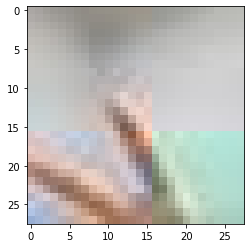

In [39]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 4. 모델 구성

In [233]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_63 (Dense)             (None, 3)               

# 5. 모델 컴파일, 훈련

In [234]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/15
134/134 [==============================] - 1s 4ms/step - loss: 9.1914 - accuracy: 0.4631
Epoch 2/15
134/134 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.7931
Epoch 3/15
134/134 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.8788
Epoch 4/15
134/134 [==============================] - 0s 4ms/step - loss: 0.1795 - accuracy: 0.9418
Epoch 5/15
134/134 [==============================] - 0s 4ms/step - loss: 0.1102 - accuracy: 0.9678
Epoch 6/15
134/134 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9796
Epoch 7/15
134/134 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.9860
Epoch 8/15
134/134 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9928
Epoch 9/15
134/134 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.9965
Epoch 10/15
134/134 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9998

# 6. 정확도 평가

### test 이미지 resized

In [235]:
test_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(test_dir_path)
test_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(test_dir_path)
test_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(test_dir_path)

print("test 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
test 이미지 resize 완료!


In [236]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

test_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/"
(x_test, y_test)=load_data(test_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [237]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0781 - accuracy: 0.6800
test_loss: 1.0780529975891113 
test_accuracy: 0.6800000071525574


# 7. 예측

In [238]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.7348128  0.02072118 0.24446596]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [0.19970225 0.6275538  0.17274398]
라벨: 0, 예측결과: 1


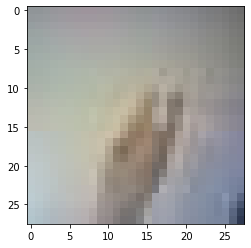

예측확률분포: [0.03096347 0.92783654 0.04120004]
라벨: 2, 예측결과: 1


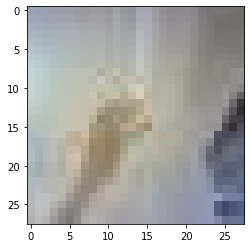

예측확률분포: [0.29942816 0.67863524 0.02193657]
라벨: 2, 예측결과: 1


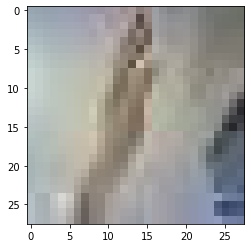

예측확률분포: [0.13883854 0.01736689 0.8437945 ]
라벨: 1, 예측결과: 2


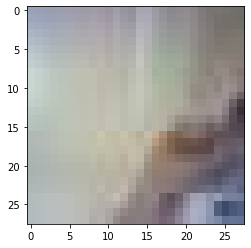

예측확률분포: [0.01443875 0.9688062  0.01675502]
라벨: 2, 예측결과: 1


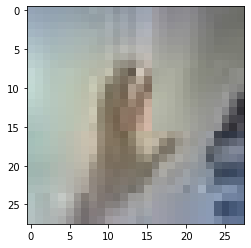

In [239]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list에서 random한 5개 확인
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 8. 프로젝트 정리

## 1) 데이터
* 훈련 세트: 4286
* 테스트 세트: 300

## 2) 딥러닝 모델 생성 및 훈련
* EXPLORATION 1번 노드의 MNIST 코드를 활용
* TF Masteer [첫 번째 신경망 훈련하기: 기초적인 분류 문제](https://www.tensorflow.org/tutorials/keras/classification#%EC%98%88%EC%B8%A1_%EB%A7%8C%EB%93%A4%EA%B8%B0) 에서도 모델 생성 및 과정을 참고함
* 이미지는 RGB이므로 처리를 빨리하기 위해 28x28(px)로 변경
* class = {rock, scissor, paper}, 클래스는 32개이므로 Dense 레이어 값을 3으로 설정

## 3) 모델 학습과 테스트
* 클래스 별로 각 1,400~1,500장 정도 있는 이미지 사용하여 훈련 세트는 4286개
* 처음엔 test를 클래스 별로 구분하지 않아서 성능이 0.01~0.04에 머물렀음
* test도 class를 구별해주고 나니 성능 평균 0.6 이상으로 향상
* 클래스가 3개이니 0.6이면 3번 중 2번은 보통으로 맞추는 정도로 볼 수 있다.

## 4) 결과
* 약 67% 정확도가 나옴. 최고 72%까지 나온 적은 있으나 평균 60% 후반에 머무름
* 데이터
    * train: 4286(개)
    * test: 300(개)
* 하이파라미터
    * 이미지 특정수: 